In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA

In [276]:
df_name = ['sepal length', 'sepal width', 'petal length',
           'petal width', 'class']
# Load Dataset
df_origin = pd.read_csv('dataset/iris.data', names=df_name)

df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [277]:
# Delete class (species)
df_origin.drop(columns='class', inplace=True)

In [278]:
pca = PCA(n_components=2)  # Reduce feature for plotting
dataset = pd.DataFrame(pca.fit_transform(df_origin))

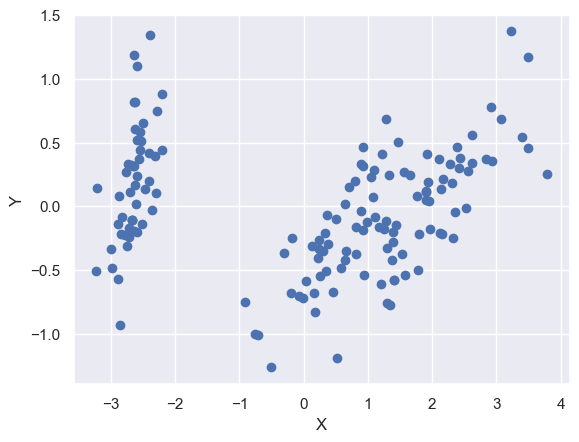

In [279]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<AxesSubplot: ylabel='Density'>

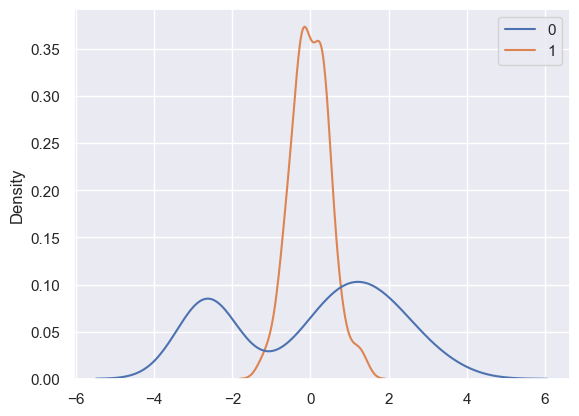

In [280]:
sns.kdeplot(dataset)

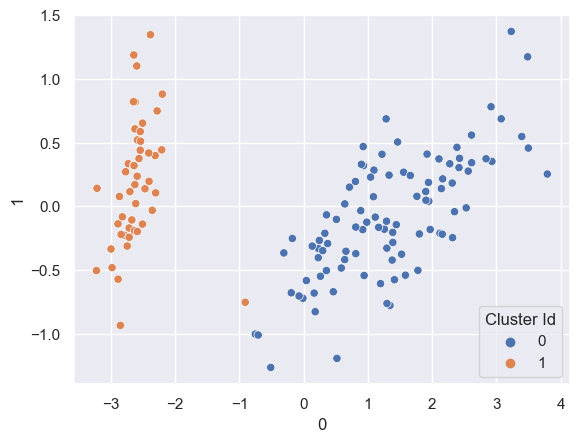

In [281]:
bandwidth = estimate_bandwidth(dataset)
mean_shift = MeanShift(bandwidth=bandwidth)
cluster = mean_shift.fit(dataset)

cluster_id = pd.DataFrame(cluster.labels_, columns=['Cluster Id'])
result = pd.concat([dataset, cluster_id], axis=1)

sns.scatterplot(x=result.iloc[:, 0], y=result.loc[:, 1], hue=result.loc[:, 'Cluster Id'])
plt.show()